# **Logistic Regression**
**IPL Match winner prediction**


**Functions Used**
1.  **pandas.DataFrame.dropna()**          - To Remove entries with missing values
2.  **pandas.DataFrame.unique()**          - To Check Unique entries in particular column
3. **sklearn.preprocessing.LabelEncoder()** - To label column values between 0 to n-1 unique values
4. **pandas.DataFrame.loc()**             - To Access Labled columns
5. **pandas.DataFrame.replace(a,b)**      - To replace value a with b
6. **seaborn.countplot()**                - To show bar chart of occurrence of a data by category
7. **pandas.DataFrame.corr()**            - Computes correlation between selected columns pairwise
8. **seaborn.heatmap()**                  - Plot rectangular data as a color-encoded matrix
9. **sklearn.model_selection.train_test_split()** - Split arrays or matrices into random train and test subsets
10. **sklearn.linear_model.LogisticRegression()** - Logistic Regression classifier
11. **sklearn.metrics.plot_confusion_matrix()** - Plots Confusion Matrix to evaluate the accuracy of a classification
12. **sklearn.metrics.classification_report()** - Build a text report showing the main classification metrics

In [1]:
# Importing Library
import numpy as np 
import pandas as pd

#Importing Data for IPL Matches from 2008-2019
matches = pd.read_csv("../input/ipldata/matches.csv")

#Checking for null values
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [2]:
#Data
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#Removing null values from relevant columns.
matches = matches.dropna(subset=['city','winner'])
matches.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              2
umpire2              2
umpire3            627
dtype: int64

In [4]:
#checking for any duplicate data in team names.
for team in matches['team1'].unique():
    print(team)

Sunrisers Hyderabad
Mumbai Indians
Gujarat Lions
Rising Pune Supergiant
Royal Challengers Bangalore
Kolkata Knight Riders
Delhi Daredevils
Kings XI Punjab
Chennai Super Kings
Rajasthan Royals
Deccan Chargers
Kochi Tuskers Kerala
Pune Warriors
Rising Pune Supergiants
Delhi Capitals


In [5]:
#As we find Rising pune supergiants & Rising pune supergiant are same team
#Hence replacing it with only one name
matches["team2"]=matches["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["team1"]=matches["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["winner"]=matches["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["toss_winner"]=matches["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

for team in matches['team1'].unique():
    print(team)

Sunrisers Hyderabad
Mumbai Indians
Gujarat Lions
Rising Pune Supergiants
Royal Challengers Bangalore
Kolkata Knight Riders
Delhi Daredevils
Kings XI Punjab
Chennai Super Kings
Rajasthan Royals
Deccan Chargers
Kochi Tuskers Kerala
Pune Warriors
Delhi Capitals


In [6]:
#encoding the data into numerical values
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

matches["team1"] = encoder.fit_transform(matches["team1"])
matches["team2"] = encoder.fit_transform(matches["team2"])
matches["winner"] = encoder.fit_transform(matches["winner"])
matches["toss_winner"] = encoder.fit_transform(matches["toss_winner"])
matches["venue"] = encoder.fit_transform(matches["venue"])

matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,13,35,0,Yuvraj Singh,27,AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,11,0,7,SPD Smith,20,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,7,0,10,CA Lynn,30,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,5,0,6,GJ Maxwell,12,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,12,3,12,bat,normal,0,12,15,0,KM Jadhav,16,NaN,NaN,NaN


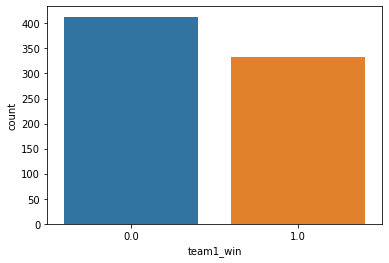

In [7]:
#connecting team1,winner,toss_winner to create an understanding between their relationships
import seaborn as sb
import matplotlib.pyplot as plt
matches.loc[matches["winner"] == matches["team1"],"team1_win"]=1
matches.loc[matches["winner"] != matches["team1"],"team1_win"]=0

matches.loc[matches["toss_winner"] == matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"] != matches["team1"],"team1_toss_win"]=0

matches.loc[matches["winner"] != matches["team1"],"team1_win"]=0
matches.loc[matches["winner"] != matches["team1"],"team1_win"]=0

matches["team1_bat"] = 0
matches.loc[(matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat"),"team1_bat"]=1

#to check how the data is distributed
sb.countplot(x="team1_win",data=matches)
plt.show()

,team1,team2,team1_toss_win,team1_bat,venue
team1,1.000000,-0.105244,-0.119728,-0.119728,0.115853
team2,-0.105244,1.000000,-0.000725,-0.000725,0.081953
team1_toss_win,-0.119728,-0.000725,1.000000,1.000000,0.053141
team1_bat,-0.119728,-0.000725,1.000000,1.000000,0.053141
venue,0.115853,0.081953,0.053141,0.053141,1.000000


<AxesSubplot:>

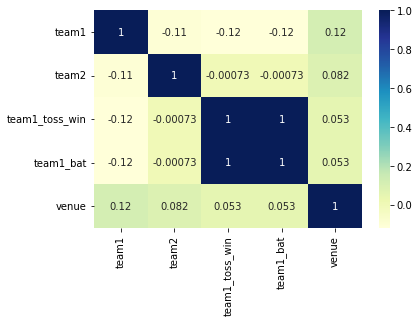

In [8]:
#feature selection
prediction = matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

correlated_features = set()
correlation_matrix = prediction.drop('team1_win',axis=1).corr()

display(correlation_matrix)

dataplot = sb.heatmap(correlation_matrix,cmap="YlGnBu",annot = True)

display(dataplot)

In [9]:
#as we can see from correlation matrix the dataset is created in a way that,
#team1 will always bat if they wins the toss.
#team2 will always field if they wins the toss.
#so we can remove the team1_bat from the list of features

prediction.drop('team1_bat',axis=1)

,team1,team2,team1_toss_win,team1_win,venue
0,13,12,0.0,1.0,27
1,8,11,0.0,0.0,20
2,4,7,0.0,0.0,30
3,11,5,0.0,0.0,12
4,12,3,1.0,1.0,16
...,...,...,...,...,...
751,7,8,0.0,0.0,39
752,0,8,1.0,0.0,17
753,13,2,0.0,0.0,0
754,2,0,0.0,0.0,0


In [10]:
X = prediction.drop("team1_win",axis=1)
target = prediction["team1_win"]
#splitting data into training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=0,shuffle=True)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of logistic regression model: {:.4f}'.format(logreg.score(x_test, y_test)))


[[87  3]
 [57  2]]
              precision    recall  f1-score   support

         0.0       0.60      0.97      0.74        90
         1.0       0.40      0.03      0.06        59

    accuracy                           0.60       149
   macro avg       0.50      0.50      0.40       149
weighted avg       0.52      0.60      0.47       149

Accuracy of logistic regression model: 0.5973
